



**Goal**: Recognize handwritten digits with a convolutional neural network (CNN). 
Train a model that will take one image and learn to predict a score for each of the possible 10 classes that image may belong to (the digits 0-9)












**General Steps**:

- Loading the data from MNIST.
- Define the architecture of the model.
- Train the model.
- Display the model performance as it trains.





**Configuration**

1-	Launch the Google Colaboratory Environment, allows you to write and execute Python code in your browser, if you configuration use can use pip install or you can specifiy your mode of execution CPU or GPU. 
You acquire a rich an interactive coding experience URL :  https://colab.research.google.com/ 

2-	Create a new notebooks 

3-	Copy the code contains in URL  then run it



**Add your libraries by import**

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

**Load your database MNIST**

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)



**Define your CNN model**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

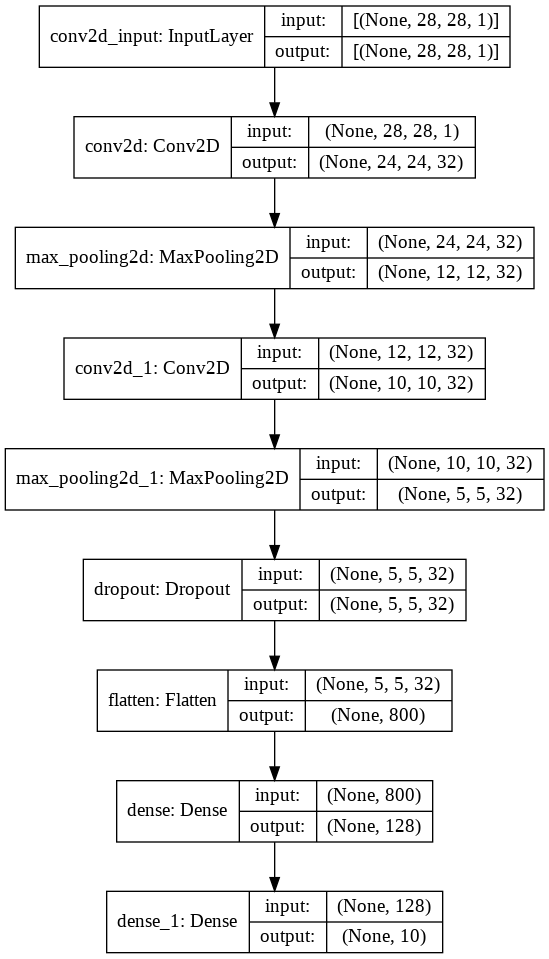

In [ ]:
#library of CNN architecture
import pydot
from keras.utils import plot_model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))
model.summary()
# https://pypi.python.org/pypi/pydot


plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

**Train your model and save your h5**

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

# Save the model
model.save('mnistCNN.h5')

# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Epoch 1/5
300/300 [==============================] - 42s 137ms/step - loss: 0.6839 - accuracy: 0.7916 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 2/5
300/300 [==============================] - 35s 117ms/step - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0443 - val_accuracy: 0.9846
Epoch 3/5
300/300 [==============================] - 35s 117ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0347 - val_accuracy: 0.9885
Epoch 4/5
300/300 [==============================] - 35s 116ms/step - loss: 0.0411 - accuracy: 0.9882 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 5/5
300/300 [==============================] - 35s 116ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0283 - val_accuracy: 0.9899
Metrics(Test loss & Test Accuracy): 
[0.02829177863895893, 0.9898999929428101]


**Evaluate your h5 model**

 

 

0
[0.02829177863895893, 0.9898999929428101]


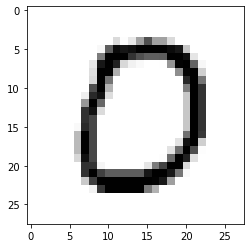

In [ ]:
# You can give an image from MNIST database by changing the image index
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model = load_model('mnistCNN.h5')
# Sample : index Image = 10
image_index = 10
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(metrics)